## 3Sum

Given an array, `nums`, of n integers, are there elements a, b, c in `nums` such that a + b + c = 0? Find all unique triplets in the array which gives the sum of zero.

Notice that the solution set must not contain duplicate triplets.

**Example 1:**

```
Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
```


**Example 2:**
```
Input: nums = []
Output: []
```


**Example 3:**
```
Input: nums = [0]
Output: []
```
 

#### Constraints:
```
0 <= nums.length <= 3000
-10^5 <= nums[i] <= 10^5
```

### My first solution (Naive)

In [39]:
def threeSum(nums):
    if len(nums) < 3:
        return []
    solution = set([])
    for i,x in enumerate(nums):
        for j,y in enumerate(nums[i+1:]):
            for k,z in enumerate(nums[i+j+1+1:]):
                if x + y + z == 0:
                    solution.add(tuple(sorted([x,y,z])))
    
    return [list(x) for x in solution]

In [40]:
threeSum([-1,0,1,2,-1,-4])

[[-1, 0, 1], [-1, -1, 2]]

In [41]:
threeSum([1,2,-2,-1])

[]

"Time limit exceeded"

It has O(n^3) time complexity.

### Instructor's solution

Pivot pointer + double pointer within an inner loop

In [58]:
def threeSum(nums):
    output = []
    length = len(nums)
    # Sorting
    nums.sort()
    # General loop (pivot)
    for i in range(length):
        right = length - 1
        left = i + 1
        
        # Finding cluster or repeated elements for pivot
        if i > 0 and nums[i] == nums[i-1]:
            continue
        
        # Inner loop with two pointers
        while left < right:
            summ = nums[i] + nums[right] + nums[left]
            if summ == 0:
                output.append([nums[i], nums[right], nums[left]])
                
                while left < right and nums[left] == nums[left + 1]:
                    left += 1
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
                
                left += 1
                right -= 1    
                
            elif summ < 0:
                left += 1
            
            else:
                right -= 1
    
    return output

In [57]:
threeSum([-1,0,1,2,-1,-4])

[[-1, 2, -1], [-1, 1, 0]]

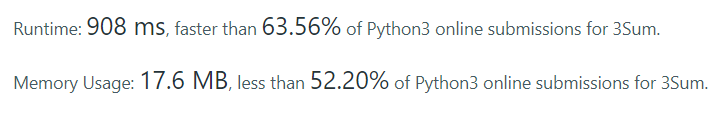

### Modification for duplicate triples

Using sets

In [59]:
def threeSum(nums):
    output = set([])
    length = len(nums)
    # Sorting
    nums.sort()
    # General loop (pivot)
    for i in range(length):
        right = length - 1
        left = i + 1
        
        # Inner loop with two pointers
        while left < right:
            summ = nums[i] + nums[right] + nums[left]
            if summ == 0:
                output.add(tuple([nums[i], nums[left], nums[right]]))
                left += 1
                right -= 1    
                
            elif summ < 0:
                left += 1
            
            else:
                right -= 1
    
    return [list(x) for x in output]

In [60]:
threeSum([-1,0,1,2,-1,-4])

[[-1, 0, 1], [-1, -1, 2]]

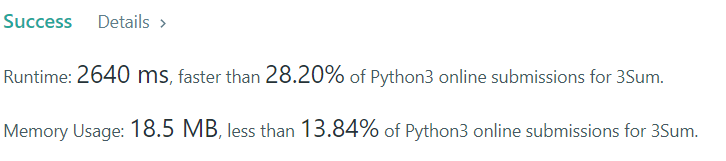